In [1]:
import numpy as np
import math

In [53]:
def reverse(index,n):
    '''
    make n into bit reversal order
    '''
    tmp=format (index,'b')
    tmp=tmp.zfill(n+1)[:0:-1]
    res=int(tmp,2) 
    return res

In [26]:
def indices_of_elements(v,l):
    tmp=np.argsort(v)
    res=tmp[0:l]
    return res

In [43]:
design_SNR=np.array([1.24])
N=4
if type(design_SNR).__module__ != np.__name__:
    xi=design_SNR*np.ones(N)
    
print(xi)

[1.24 1.24 1.24 1.24]


In [50]:
def main_const(N,K,design_SNR):
    #design SNRが複数あるかどうか判定する
    if type(design_SNR).__module__ != np.__name__:
        design_SNR=design_SNR*np.ones(N)
    elif len(design_SNR)!=N:
        print("design_SNR_len_error!")
        
    xi=np.log(design_SNR)
    
    n=int(math.log2(N))
    for i in range(1,n+1):
        J=2**i
        for k in range(0,int(N/J)-1):
            for j in range(0,int(J/2)-1):
                xi0=xi[k*J+j]
                xi1=xi[k*J+j+int(J/2)] 
                lambda0=calc_lambda(xi0)
                lambda1=calc_lambda(xi1)
                xi[k*J+j]=calc_lambda(max(lambda0,lambda1)+math.log(1+math.exp(-1*abs(lambda0-lambda1))))
                xi[k*J+j+int(J/2)]=max(xi0,xi1)+math.log(1+math.exp(-1*abs(xi0-xi1)))
    #return xi
    
    tmp=indices_of_elements(xi,N)
    frozen_bits=np.sort(tmp[:N-K])
    info_bits=np.sort(tmp[N-K:])
    
    #bit reversal order
    for i in range(len(frozen_bits)):
        frozen_bits[i]=reverse(frozen_bits[i],n)
    frozen_bits=np.sort(frozen_bits)
        
    for i in range(len(info_bits)):
        info_bits[i]=reverse(info_bits[i],n)
    info_bits=np.sort(info_bits)
    
    return frozen_bits,info_bits

In [51]:
xi=0
def calc_lambda(xi):
    Alpha=1.16125
    Gamma1=0.04
    Gamma2=1
    Gamma3=10
    Xi0=-11.3143
    C1=0.55523
    C2=0.721452
    H21=1.396634
    H22=0.872764
    H23=1.148562
    H31=1.266967
    H32=0.938175
    H33=0.986830

    if xi<Xi0:
        B=math.log(2)+2*math.log(math.log(2))+2*math.log(Alpha)-2*xi
        return math.log(B+(1/B-1)*math.log(B))-math.log(2)

    gamma=math.exp(xi)
    if gamma>Gamma3:
        return math.log(math.log(2))+math.log(Alpha)-gamma-xi/2

    elif gamma<Gamma1:
        U=1-(gamma-gamma**2+4/3*gamma**3)/math.log(2)

    elif gamma<Gamma2:
        U=1-(1-math.exp(-1*H21*(gamma**H22)))**H23
        
    else:
        U=1-(1-math.exp(-1*H31*(gamma**H32)))*H33
        
    if U<C1:
        A=(-5+24*math.log(2)*U+2*math.sqrt(13+12*math.log(2)*U*(12*math.log(2)*U-5)))**(1/3)
        return math.log(1-3/A+A)-2*math.log(2)
        
    elif U<C2:
        return (math.log(-1*math.log(1-U**(1/H23)))-math.log(H21))/H22

    else:
        return (math.log(-1*math.log(1-U**(1/H33)))-math.log(H31))/H32

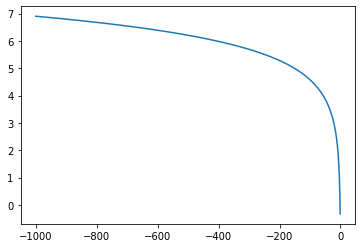

In [24]:
import matplotlib.pyplot as plt
x=np.arange(-1000,0)
y=np.zeros((len(x)))
for i,a in enumerate(x):
    y[i]=calc_lambda(a)
    
plt.plot(x, y)